Assignment machine failure

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the data machine failure

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
m = df.isna().sum()
m[m>0]

Series([], dtype: int64)

Seperate X and Y 

In [5]:
X = df.drop(columns=['id','Machine failure','Product ID'])
Y = df[['Machine failure']]

In [6]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


Cat and con seperation for X 

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Type']

In [10]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

Create a pipeline for selection 

use ordinal encoder for cat feature

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [13]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

In [14]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [15]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Type'])])

In [16]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


Perform feature selection with mutual info scores

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00487374, 0.00240723, 0.01931437, 0.01955114, 0.00647025,
       0.00800629, 0.02416   , 0.01184846, 0.01920613, 0.00157073,
       0.0112867 ])

In [18]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024160
num__Torque [Nm]                0.019551
num__Rotational speed [rpm]     0.019314
num__OSF                        0.019206
num__PWF                        0.011848
cat__Type                       0.011287
num__TWF                        0.008006
num__Tool wear [min]            0.006470
num__Air temperature [K]        0.004874
num__Process temperature [K]    0.002407
num__RNF                        0.001571
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

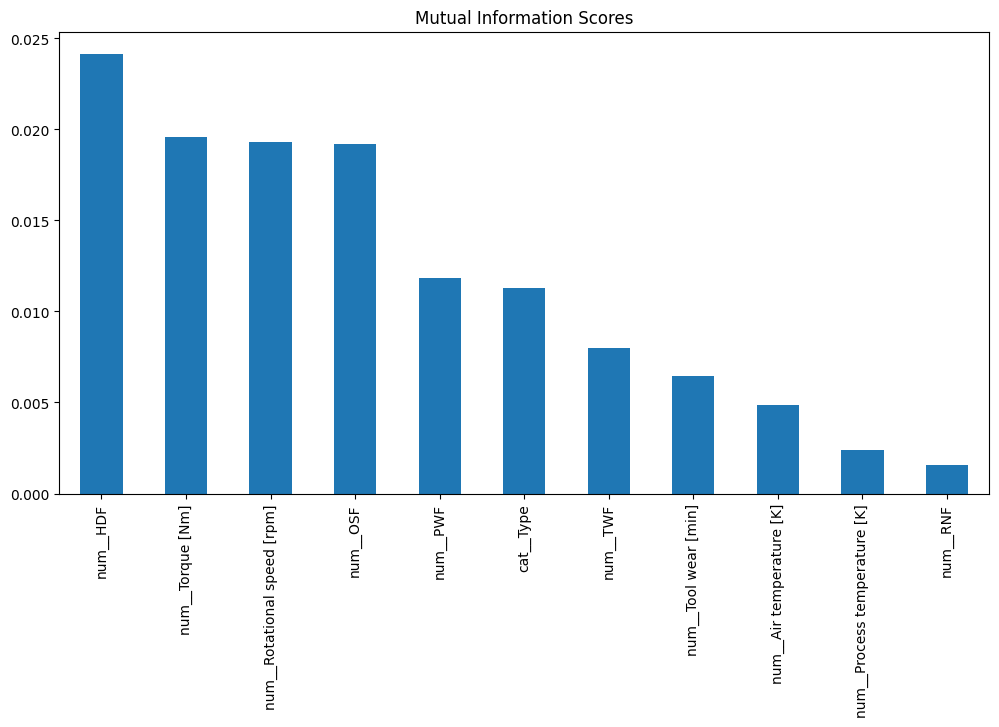

In [19]:
mi.plot(kind='bar', title='Mutual Information Scores', figsize=(12, 6))

Select 10 feature 

In [20]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=10)
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'cat__Type'], dtype=object)

Get the original columns

In [21]:
sel_cols[0].split('__')

['num', 'Air temperature [K]']

In [22]:
sel_cols[0].split('__')[1]

'Air temperature [K]'

In [23]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [24]:
imp_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'Type']

In [25]:
X_imp = X[imp_cols]
X_imp

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Type
0,300.6,309.6,1596,36.1,140,0,0,0,0,L
1,302.6,312.1,1759,29.1,200,0,0,0,0,M
2,299.3,308.5,1805,26.5,25,0,0,0,0,L
3,301.0,310.9,1524,44.3,197,0,0,0,0,L
4,298.0,309.0,1641,35.4,34,0,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,M
136425,297.5,308.5,1447,49.1,2,0,0,0,0,H
136426,300.5,311.8,1524,38.5,214,0,0,0,0,L
136427,301.7,310.9,1447,46.3,42,0,0,0,0,L


seperate cat and con feature for selected coulmns

In [26]:
cat_sel = list(X_imp.columns[X_imp.dtypes=='object'])
con_sel = list(X_imp.columns[X_imp.dtypes!='object'])

In [27]:
cat_sel

['Type']

In [28]:
con_sel

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF']

Create a final preprocessing pipeline

OneHotEncoder

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [31]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [32]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [33]:
X_sel_pre = pre2.fit_transform(X_imp)
X_sel_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0


Apply train test split for X_sel_pre

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=21)


In [35]:
xtrain.shape

(109143, 12)

In [36]:
xtest.shape

(27286, 12)

Algo evaluation

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
dct = {'Logistic' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier(),
       'KNN': KNeighborsClassifier(),
       'SVM': SVC()}


In [39]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

Fit the model and evaluate the results

In [40]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [41]:
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # 5 - fold cross validation on training
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : Logistic

Train F1 : 0.8651
Train F1 Cross Validated : 0.9310
Test F1 : 0.8530


Model name : Decision Tree

Train F1 : 0.9956
Train F1 Cross Validated : 0.8745
Test F1 : 0.7523


Model name : Random Forest

Train F1 : 0.9956
Train F1 Cross Validated : 0.9294
Test F1 : 0.8609


Model name : Gradient Boost

Train F1 : 0.8723
Train F1 Cross Validated : 0.9288
Test F1 : 0.8541




In [ ]:
result_dct={
    "Model_name":list(dct.keys()),
    'Train F1':tr,
    'Test F1':ts,
    'Train F1 CV':tr_cv
}

In [ ]:
result_df=pd.DataFrame(result_dct)
result_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.865113,0.852980,0.931022
1,Decision Tree,0.995620,0.753129,0.872377
2,Random Forest,0.995631,0.858268,0.929762
3,Gradient Boost,0.874185,0.855629,0.928385
4,KNN,0.866033,0.852980,0.929737
5,SVM,0.865486,0.854111,0.931433


In [ ]:
result_df.sort_values(by="Test F1",ascending=False)

,Model_name,Train F1,Test F1,Train F1 CV
2,Random Forest,0.995631,0.858268,0.929762
3,Gradient Boost,0.874185,0.855629,0.928385
5,SVM,0.865486,0.854111,0.931433
0,Logistic,0.865113,0.852980,0.931022
4,KNN,0.866033,0.852980,0.929737
1,Decision Tree,0.995620,0.753129,0.872377


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
best_model=LogisticRegression()
best_model.fit(xtrain,ytrain)


NameError: name 'xtrain' is not defined

In [ ]:
model.score(xtrain,ytrain)

0.9962434604143189

In [ ]:
model.score(xtest,ytest)

0.9959319797698454

Predict the results for train and test

In [ ]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [ ]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [ ]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


Create a confusion model

In [ ]:
c = model.classes_
c

array([0, 1], dtype=int64)

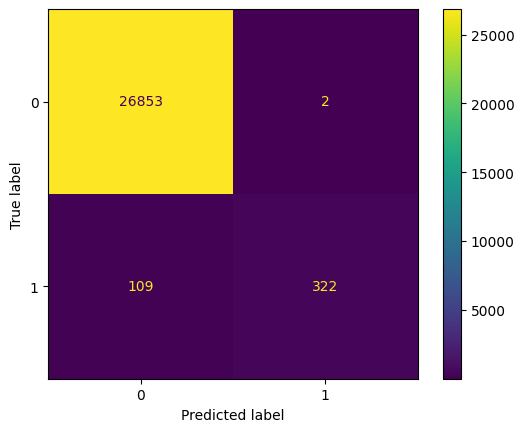

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

Classification results

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26855
           1       0.99      0.75      0.85       431

    accuracy                           1.00     27286
   macro avg       0.99      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



Plot roc curve

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

NameError: name 'xtrain' is not defined